# Color Threshold, Green Screen

## Import resources

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import cv2
import os
os.chdir(r'C:\Users\atavares\PycharmProjects\ComputerVision')

## Read in and display the image

Images dimensions: (450, 660, 3)


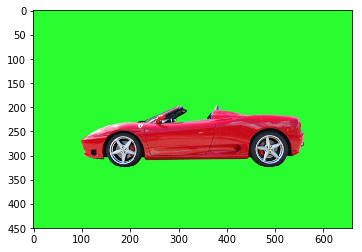

In [6]:
# Read in the image
image = mpimg.imread('data/images/car_green_screen.jpg')

# Print out the image dimensions (height, width, and depth (color))
print('Images dimensions:', image.shape)

# Display the image
plt.imshow(image)

## Define the  color threshold

In [7]:
# Define our color selection boundaries in RGB values
lower_green = np.array([0, 250, 0])
upper_green = np.array([255, 255, 255])

## Create a mask

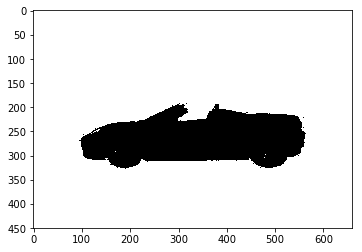

In [8]:
# Define the masked area
mask = cv2.inRange(image, lower_green, upper_green)

# Visualize the mask
plt.imshow(mask, cmap='gray')


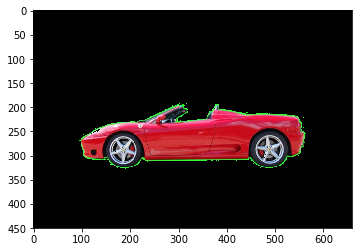

In [10]:
# Mask the image to let the car show through
masked_image = np.copy(image)
masked_image[mask != 0] = [0, 0, 0]

# Display it!
plt.imshow(masked_image)

# Mask and add a background image

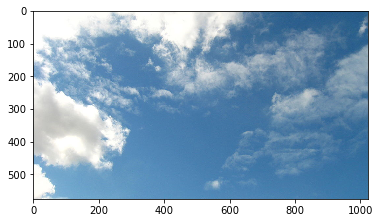

In [19]:
# Load in a background, and convert it to RGB
background_image = mpimg.imread('data/images/sky.jpg')

# Crop it or resize the background to 450 x 660
crop_background = cv2.resize(background_image, (660, 450))

# Mask the cropped background so that the car area is blocked
crop_background[mask == 0] = [0, 0, 0]

# Display the background
plt.imshow(background_image)

## Create a complete image

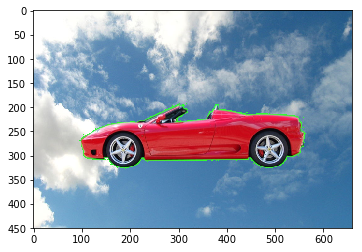

In [20]:
# Add the two images together to create a complete image!
complete_image = masked_image + crop_background

# Display the complete image
plt.imshow(complete_image)